# CAPSTONE PROJECT
## Phase 2: Data Understanding & Preparation
### Data Ingestion & Wrangling
SALIFOU SYLLA

OCTOBER 7, 2020

# Crash Reporting from dataMontgomery

The dataset used is Crash Reporting Data set. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The following are those three datasets:
1.	Crash Reporting - Incidents Data:
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf
2.	Crash Reporting - Drivers Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
3.	Crash Reporting - Non-Motorists Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fkdce5


## Importing Libraries

In [25]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pyproj import Proj, transform
from datetime import datetime
from datetime import date, time
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## Loading web data file to pandas dataframe
Since dataMontgomery updates its datasets frequently, then we are
reading data from the dataMontgomery url each time in the code. 

### Loading the first dataset (Incidents Data)

In [26]:
url = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
incidentsData = pd.read_csv(url)
incidentsData.info()

C:\Users\sonko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65518 entries, 0 to 65517
Data columns (total 44 columns):
Report Number                   65518 non-null object
Local Case Number               65518 non-null object
Agency Name                     65518 non-null object
ACRS Report Type                65518 non-null object
Crash Date/Time                 65518 non-null object
Hit/Run                         65516 non-null object
Route Type                      56800 non-null object
Mile Point                      57158 non-null float64
Mile Point Direction            56812 non-null object
Lane Direction                  57169 non-null object
Lane Number                     65518 non-null int64
Lane Type                       6328 non-null object
Number of Lanes                 65518 non-null int64
Direction                       57158 non-null object
Distance                        59024 non-null float64
Distance Unit                   57168 non-null object
Road Grade                  

In [27]:
# remove spaces in columns name
incidentsData.columns = incidentsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65518 entries, 0 to 65517
Data columns (total 44 columns):
report_number                   65518 non-null object
local_case_number               65518 non-null object
agency_name                     65518 non-null object
acrs_report_type                65518 non-null object
crash_date_time                 65518 non-null object
hit_run                         65516 non-null object
route_type                      56800 non-null object
mile_point                      57158 non-null float64
mile_point_direction            56812 non-null object
lane_direction                  57169 non-null object
lane_number                     65518 non-null int64
lane_type                       6328 non-null object
number_of_lanes                 65518 non-null int64
direction                       57158 non-null object
distance                        59024 non-null float64
distance_unit                   57168 non-null object
road_grade                  

### Loading the second dataset (Drivers Data)

In [28]:
url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"
driversData = pd.read_csv(url)
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116390 entries, 0 to 116389
Data columns (total 43 columns):
Report Number                     116390 non-null object
Local Case Number                 116390 non-null object
Agency Name                       116390 non-null object
ACRS Report Type                  116390 non-null object
Crash Date/Time                   116390 non-null object
Route Type                        105117 non-null object
Road Name                         105683 non-null object
Cross-Street Type                 105103 non-null object
Cross-Street Name                 105679 non-null object
Off-Road Description              10706 non-null object
Municipality                      12683 non-null object
Related Non-Motorist              3641 non-null object
Collision Type                    116001 non-null object
Weather                           107191 non-null object
Surface Condition                 102615 non-null object
Light                             1154

In [29]:
# remove spaces in columns name
driversData.columns = driversData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116390 entries, 0 to 116389
Data columns (total 43 columns):
report_number                     116390 non-null object
local_case_number                 116390 non-null object
agency_name                       116390 non-null object
acrs_report_type                  116390 non-null object
crash_date_time                   116390 non-null object
route_type                        105117 non-null object
road_name                         105683 non-null object
cross_street_type                 105103 non-null object
cross_street_name                 105679 non-null object
off_road_description              10706 non-null object
municipality                      12683 non-null object
related_non_motorist              3641 non-null object
collision_type                    116001 non-null object
weather                           107191 non-null object
surface_condition                 102615 non-null object
light                             1154

### Loading the third dataset (Non-Motorists Data)

In [30]:
url = "https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD"
nonMotoristsData = pd.read_csv(url)
nonMotoristsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 32 columns):
Report Number                       3783 non-null object
Local Case Number                   3783 non-null int64
Agency Name                         3783 non-null object
ACRS Report Type                    3783 non-null object
Crash Date/Time                     3783 non-null object
Route Type                          2889 non-null object
Road Name                           2935 non-null object
Cross-Street Type                   2889 non-null object
Cross-Street Name                   2934 non-null object
Off-Road Description                848 non-null object
Municipality                        414 non-null object
Related Non-Motorist                3783 non-null object
Collision Type                      3662 non-null object
Weather                             3439 non-null object
Surface Condition                   2823 non-null object
Light                               3752 

In [31]:
# remove spaces in columns name
nonMotoristsData.columns = nonMotoristsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
nonMotoristsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 32 columns):
report_number                       3783 non-null object
local_case_number                   3783 non-null int64
agency_name                         3783 non-null object
acrs_report_type                    3783 non-null object
crash_date_time                     3783 non-null object
route_type                          2889 non-null object
road_name                           2935 non-null object
cross_street_type                   2889 non-null object
cross_street_name                   2934 non-null object
off_road_description                848 non-null object
municipality                        414 non-null object
related_non_motorist                3783 non-null object
collision_type                      3662 non-null object
weather                             3439 non-null object
surface_condition                   2823 non-null object
light                               3752 

# Combining DataFrames with Pandas
## Combine three DataFrames using a unique ID found in those DataFrames



### Identifying join keys
To identify appropriate join keys we first need to know which field(s) are shared between the three files (DataFrames). We might inspect all three DataFrames to identify these columns. If we are lucky, the three DataFrames will have columns with the same name that also contain the same data. If we are less lucky, we need to identify a (differently-named) column in each DataFrame that contains the same information.

In [32]:
incidentsData.columns

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'hit_run', 'route_type', 'mile_point',
       'mile_point_direction', 'lane_direction', 'lane_number', 'lane_type',
       'number_of_lanes', 'direction', 'distance', 'distance_unit',
       'road_grade', 'nontraffic', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'at_fault', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse',
       'first_harmful_event', 'second_harmful_event', 'fixed_oject_struck',
       'junction', 'intersection_type', 'intersection_area', 'road_alignment',
       'road_condition', 'road_division', 'latitude', 'longitude', 'location'],
      dtype='object')

In [33]:
driversData.columns


Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'route_type', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse', 'person_id',
       'driver_at_fault', 'injury_severity', 'circumstance',
       'driver_distracted_by', 'drivers_license_state', 'vehicle_id',
       'vehicle_damage_extent', 'vehicle_first_impact_location',
       'vehicle_second_impact_location', 'vehicle_body_type',
       'vehicle_movement', 'vehicle_continuing_dir', 'vehicle_going_dir',
       'speed_limit', 'driverless_vehicle', 'parked_vehicle', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'equipment_problems', 'latitude',
       'longitude', 'location'],
      dtype='object')

In [34]:
nonMotoristsData.columns

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'route_type', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse', 'person_id',
       'pedestrian_type', 'pedestrian_movement', 'pedestrian_actions',
       'pedestrian_location', 'pedestrian_obeyed_traffic_signal',
       'pedestrian_visibility', 'at_fault', 'injury_severity',
       'safety_equipment', 'latitude', 'longitude', 'location'],
      dtype='object')

The report number or ACRS Report Number (acrs_report_type) assigned to the incident is a common key identifier.

## Concatenating Dataframes
Now that we know the fields with the common incidents ID attributes in each DataFrame, we are almost ready to join our data. However, since there are different types of joins, we also need to decide which type of join makes sense for our analysis.

In [35]:
concat1 = pd.concat([incidentsData, driversData])



In [36]:
#The head function will tell us the top records in the data set. By default, python shows you only the top 5 records.
concat1.head()

,acrs_report_type,agency_name,at_fault,circumstance,collision_type,crash_date_time,cross_street_name,cross_street_type,direction,distance,...,vehicle_damage_extent,vehicle_first_impact_location,vehicle_going_dir,vehicle_id,vehicle_make,vehicle_model,vehicle_movement,vehicle_second_impact_location,vehicle_year,weather
0,Property Damage Crash,Montgomery County Police,DRIVER,NaN,SAME DIR REAR END,02/21/2018 09:42:00 AM,BLACKBURN RD,County,South,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
1,Injury Crash,Montgomery County Police,DRIVER,NaN,SAME DIR REAR END,11/03/2017 02:40:00 PM,ENT TO BURNT MILLS SHOPPING CENTER,Unknown,North,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
2,Property Damage Crash,MONTGOMERY,DRIVER,NaN,SINGLE VEHICLE,07/06/2015 03:30:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RAINING
3,Property Damage Crash,Montgomery County Police,DRIVER,NaN,SAME DIRECTION SIDESWIPE,06/01/2017 08:38:00 AM,OLD COLUMBIA PIKE,County,East,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
4,Property Damage Crash,Montgomery County Police,DRIVER,NaN,STRAIGHT MOVEMENT ANGLE,09/08/2016 06:53:00 PM,MIDDLEBROOK RD,County,North,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR


In [37]:
#The shape attribute tells us a number of observations and variables we have in the data set.
#It is used to check the dimension of data.
concat1.shape

(181908, 65)

In [38]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
concat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181908 entries, 0 to 116389
Data columns (total 65 columns):
acrs_report_type                  181908 non-null object
agency_name                       181908 non-null object
at_fault                          65518 non-null object
circumstance                      22514 non-null object
collision_type                    181185 non-null object
crash_date_time                   181908 non-null object
cross_street_name                 162843 non-null object
cross_street_type                 161892 non-null object
direction                         57158 non-null object
distance                          59024 non-null float64
distance_unit                     57168 non-null object
driver_at_fault                   116390 non-null object
driver_distracted_by              116390 non-null object
driver_substance_abuse            150072 non-null object
driverless_vehicle                116390 non-null object
drivers_license_state             1108

In [39]:
concat2 = pd.concat([concat1, nonMotoristsData])

In [40]:
concat2.head()

,acrs_report_type,agency_name,at_fault,circumstance,collision_type,crash_date_time,cross_street_name,cross_street_type,direction,distance,...,vehicle_damage_extent,vehicle_first_impact_location,vehicle_going_dir,vehicle_id,vehicle_make,vehicle_model,vehicle_movement,vehicle_second_impact_location,vehicle_year,weather
0,Property Damage Crash,Montgomery County Police,DRIVER,NaN,SAME DIR REAR END,02/21/2018 09:42:00 AM,BLACKBURN RD,County,South,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
1,Injury Crash,Montgomery County Police,DRIVER,NaN,SAME DIR REAR END,11/03/2017 02:40:00 PM,ENT TO BURNT MILLS SHOPPING CENTER,Unknown,North,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
2,Property Damage Crash,MONTGOMERY,DRIVER,NaN,SINGLE VEHICLE,07/06/2015 03:30:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RAINING
3,Property Damage Crash,Montgomery County Police,DRIVER,NaN,SAME DIRECTION SIDESWIPE,06/01/2017 08:38:00 AM,OLD COLUMBIA PIKE,County,East,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR
4,Property Damage Crash,Montgomery County Police,DRIVER,NaN,STRAIGHT MOVEMENT ANGLE,09/08/2016 06:53:00 PM,MIDDLEBROOK RD,County,North,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR


In [41]:
concat2.shape

(185691, 72)

In [42]:
concat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185691 entries, 0 to 3782
Data columns (total 72 columns):
acrs_report_type                    185691 non-null object
agency_name                         185691 non-null object
at_fault                            69014 non-null object
circumstance                        22514 non-null object
collision_type                      184847 non-null object
crash_date_time                     185691 non-null object
cross_street_name                   165777 non-null object
cross_street_type                   164781 non-null object
direction                           57158 non-null object
distance                            59024 non-null float64
distance_unit                       57168 non-null object
driver_at_fault                     116390 non-null object
driver_distracted_by                116390 non-null object
driver_substance_abuse              153148 non-null object
driverless_vehicle                  116390 non-null object
drivers_li

# Exploratory Data Analysis

Dataset containts different informations about the accients ocurred in the Montgomery County from 2015 to 2020. The main goal is to extract some insights that can be useful to reduce the number of accidents in the County.

## Describe the dataset


In [43]:
# Shape&Info 
print('Shape:',concat2.shape)
print('Columns:', concat2.columns)

Shape: (185691, 72)
Columns: Index(['acrs_report_type', 'agency_name', 'at_fault', 'circumstance',
       'collision_type', 'crash_date_time', 'cross_street_name',
       'cross_street_type', 'direction', 'distance', 'distance_unit',
       'driver_at_fault', 'driver_distracted_by', 'driver_substance_abuse',
       'driverless_vehicle', 'drivers_license_state', 'equipment_problems',
       'first_harmful_event', 'fixed_oject_struck', 'hit_run',
       'injury_severity', 'intersection_area', 'intersection_type', 'junction',
       'lane_direction', 'lane_number', 'lane_type', 'latitude', 'light',
       'local_case_number', 'location', 'longitude', 'mile_point',
       'mile_point_direction', 'municipality', 'non_motorist_substance_abuse',
       'nontraffic', 'number_of_lanes', 'off_road_description',
       'parked_vehicle', 'pedestrian_actions', 'pedestrian_location',
       'pedestrian_movement', 'pedestrian_obeyed_traffic_signal',
       'pedestrian_type', 'pedestrian_visibility', 

### The main features of the dataset are:

**report_number:** ACRS Report Number assigned to the incident.                 
local_case_number: Case number from the local investigating agency for the incident.<br>
agency_name: Name of the investigating agency.<br>
**acrs_report_type:** Identifies crash as property, injury, or fatal.<br>
**crash_date_time:** Date and Time of crash.<br>
**hit_run:** Unit-Vehicle left the scene resulting in a hit and run event.<br>
**route_type:** Type of roadway at crash location.<br>
mile_point: Location - Mile point.<br>
mile_point_direction: Location - Mile point direction.<br>
lane_direction: Road/Area - Lane direction of travel.<br>
lane_number: Road/Area - Lane number of where the event occurred on.<br>
**lane_type:** Road/Area - Type of roadway/area lane.<br>
**number_of_lanes:** Road/Area - Number of lanes.<br>
**direction:** Location - Direction from mile point.<br>
**distance:** Location - Distance from mile point.<br>
distance_unit: Location - Unit of measurement for mile point distance.<br>
**road_grade:** Road/Area - Roadway grade.<br>
**nontraffic:** Location - Recorded as a Non-Traffic event.<br>
**road_name:** Name of road.<br>
cross_street_type: Roadway type for nearest cross-street.<br>
cross_street_name: Name of nearest cross-street.<br>
**off_road_description:** Description of location for off-road collisions.<br>
**municipality:** Jurisdiction for crash location.<br>
**related_non_motorist:** Type(s) of non-motorist involved.<br>
**at_fault:**  Fault by a driver or non-motorist.<br>
**collision_type:** Type of collision.<br>
**weather:** Weather at collision location.<br>
**surface_condition:** Condition of roadway surface.<br>
**light:** Lighting conditions.<br>
**traffic_control:** Signage or traffic control devices.<br>
**driver_substance_abuse:** Substance abuse detected for all drivers involved.<br>
**non_motorist_substance_abuse:** Substance abuse detected for all non-motorists involved.<br>
first_harmful_event: The first event of the collision.<br>
second_harmful_event: The second event of the collision (if applicable).<br>
fixed_oject_struck: The fixed object struck by vehicle (if applicable).<br>
**junction:** The type of junction where the collision occurred.<br>
**intersection_type:** If the collision was intersection related, this field describes the intersection characteristics.<br>
**intersection_area:** Road/Area-Describes the interchange type, such as it being a thru roadway, ramp, or other related area types.<br>
road_alignment: The road alignment where the collision occurred.<br>
**road_condition:** The condition of the road when the collision occurred.<br>
road_division: The road division where the collision occurred.<br>
**latitude:** Y coordinate of crash location.<br>
**longitude:** X coordinate of crash location.<br>
**location:**

In order to visualize the geolocated data with the folium library, this data should be projected to GPS reference system.

In [44]:
#The described method will help to see how data has been spread for numerical values.
#We can clearly see the minimum value, mean values, different percentile values, and maximum values.
concat2.describe()

,distance,lane_number,latitude,longitude,mile_point,number_of_lanes,speed_limit,vehicle_year
count,59024.000000,65518.000000,185691.000000,185691.000000,57158.000000,65518.000000,116390.000000,116390.000000
mean,62.790412,1.209866,39.082351,-77.112982,4.038093,2.066455,32.860512,1968.893848
std,136.664458,0.980901,0.072760,0.100181,5.473818,1.316433,11.019662,329.577357
min,0.000000,0.000000,37.720000,-79.486000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,39.023297,-77.188660,0.450000,1.000000,30.000000,2005.000000
50%,0.000000,1.000000,39.074423,-77.105664,1.961000,2.000000,35.000000,2010.000000
75%,50.000000,2.000000,39.138227,-77.040360,5.270000,3.000000,40.000000,2014.000000
max,1000.000000,8.000000,39.990414,-75.527708,300.000000,13.000000,70.000000,9999.000000


## Handling missing value

In [45]:
#Checking for missing value in any column
concat2.isnull().sum()

acrs_report_type                         0
agency_name                              0
at_fault                            116677
circumstance                        163177
collision_type                         844
crash_date_time                          0
cross_street_name                    19914
cross_street_type                    20910
direction                           128533
distance                            126667
distance_unit                       128523
driver_at_fault                      69301
driver_distracted_by                 69301
driver_substance_abuse               32543
driverless_vehicle                   69301
drivers_license_state                74885
equipment_problems                   95032
first_harmful_event                 120531
fixed_oject_struck                  172139
hit_run                             120175
injury_severity                      65518
intersection_area                   167215
intersection_type                   153573
junction   

## Handling Duplicate records

In [46]:
#Check for duplicate data
duplicate = concat2.duplicated()
print(duplicate.sum())

0


## Handling Outlier

In [47]:
# Municipality names
municipality_names = concat2['municipality'].value_counts().index
municipality_names

Index(['ROCKVILLE', 'GAITHERSBURG', 'TAKOMA PARK', 'KENSINGTON',
       'CHEVY CHASE #4', 'CHEVY CHASE #3', 'FRIENDSHIP HEIGHTS', 'POOLESVILLE',
       'CHEVY CHASE VILLAGE', 'CHEVY CHASE #5', 'CHEVY CHASE VIEW', 'SOMERSET',
       'GARRETT PARK', 'WASHINGTON GROVE', 'MATINS ADDITION', 'GLEN ECHO',
       'NORTH CHEVY CHASE', 'LAYTONSVILLE', 'BROOKEVILLE', 'DRUMMOND'],
      dtype='object')

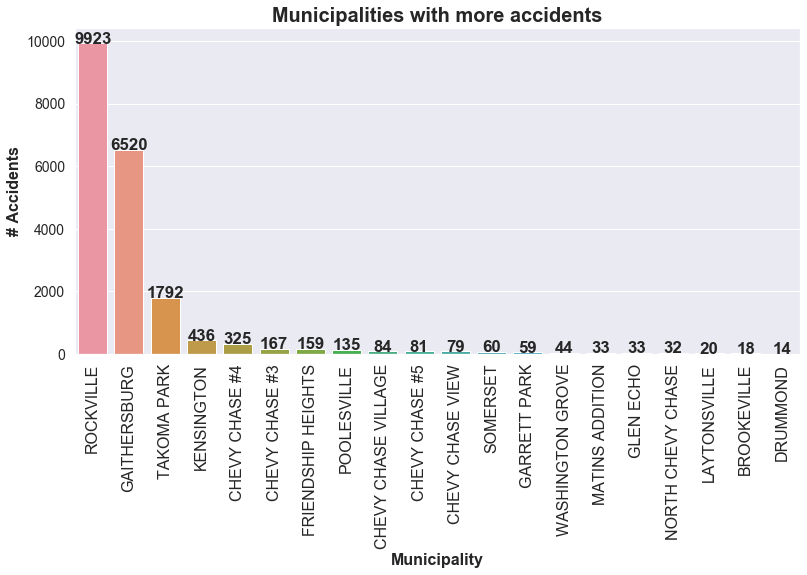

In [48]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        plot_name.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90) 
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 3:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
            label.set_rotation(20)        
        
# Visualization
plt.figure(figsize=(13,6))
x = concat2['municipality'].value_counts().index
y = concat2['municipality'].value_counts()
ax = sns.barplot(x=x, y=y)
plt.title("Municipalities with more accidents", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Municipality', fontsize=16).set_weight('bold')
tick_format(ax,1)

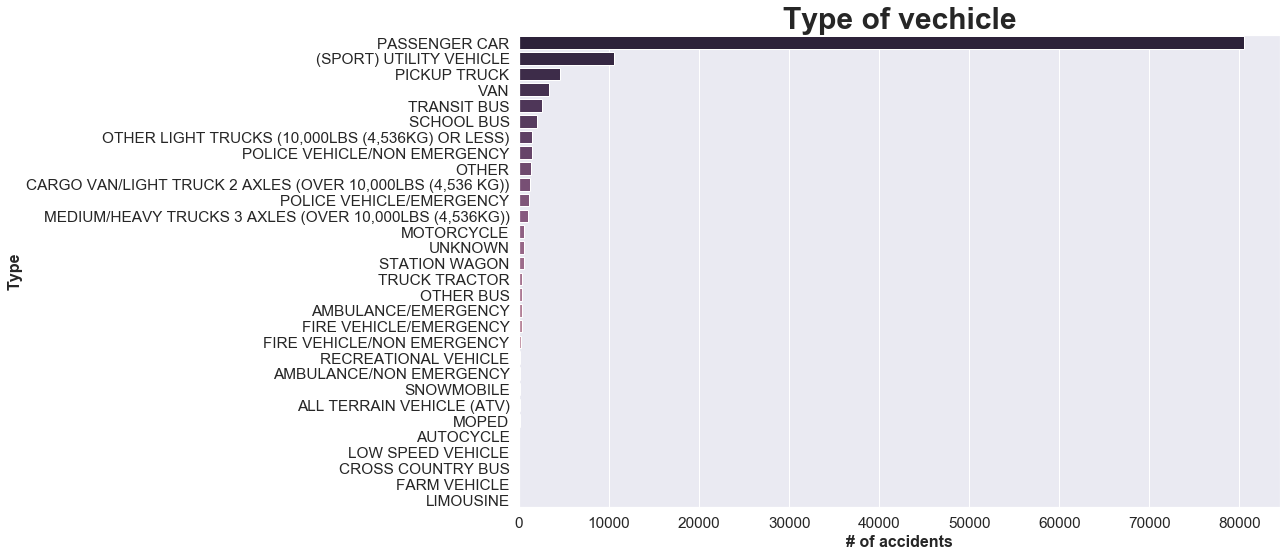

In [49]:
typeofvehicle = concat2['vehicle_body_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofvehicle, 
                 y=typeofvehicle.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Type of vechicle", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')


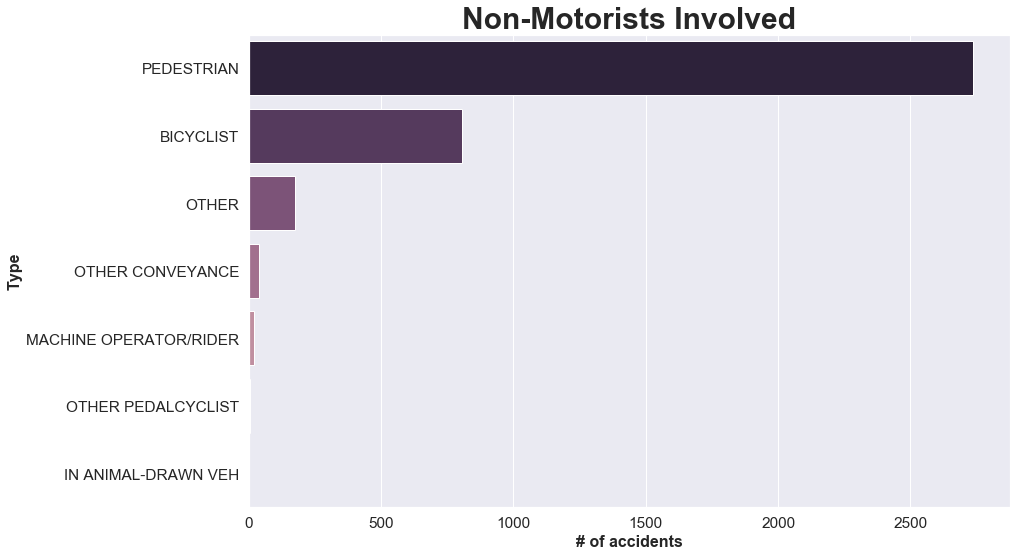

In [50]:
typeofpedestrian = concat2['pedestrian_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofpedestrian, 
                 y=typeofpedestrian.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofpedestrian.index)),
                 ax=ax1)
plt.title("Non-Motorists Involved", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

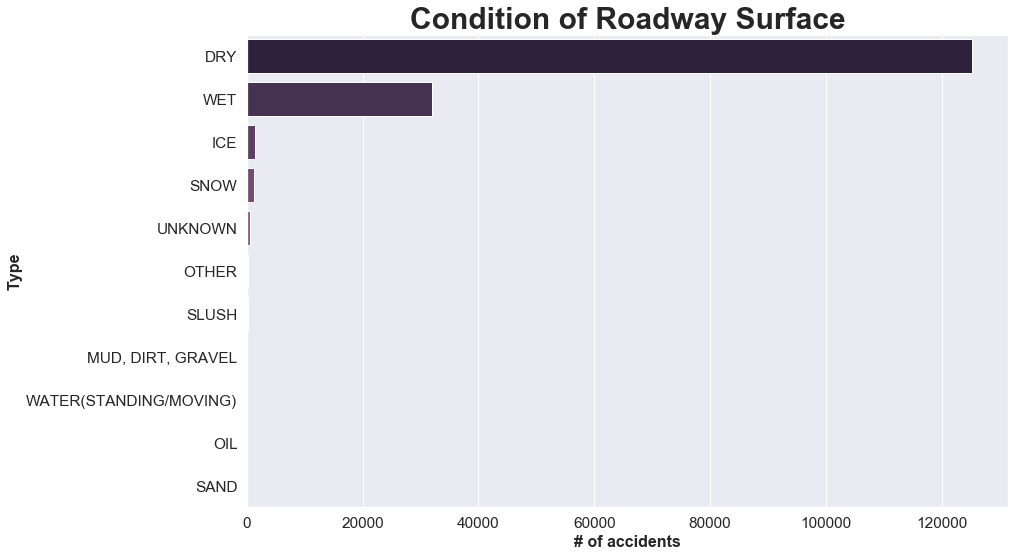

In [51]:

roadway_surface = concat2['surface_condition'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=roadway_surface, 
                 y=roadway_surface.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(roadway_surface.index)),
                 ax=ax1)
plt.title("Condition of Roadway Surface", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

In [52]:
# Create new columns
#convert the column to datetime first using
import datetime as dt

concat2['DateTime'] = pd.to_datetime(concat2['crash_date_time'])
#df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
concat2['Day'] = concat2['DateTime'].dt.strftime('%d')
concat2['Month'] = concat2['DateTime'].dt.strftime('%m')
concat2['Year'] = concat2['DateTime'].dt.strftime('%Y')
#df['Time'] = df['DateTime'].dt.strftime('%H:%M')
concat2['Hour'] = concat2['DateTime'].dt.strftime('%H')
concat2['Dayofweek'] = concat2['DateTime'].dt.day_name()


print(concat2)


           acrs_report_type                agency_name at_fault circumstance  \
0     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
1              Injury Crash   Montgomery County Police   DRIVER          NaN   
2     Property Damage Crash                 MONTGOMERY   DRIVER          NaN   
3     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
4     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
5     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
6     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
7     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
8     Property Damage Crash   Montgomery County Police   DRIVER          NaN   
9     Property Damage Crash  Rockville Police Departme  UNKNOWN          NaN   
10    Property Damage Crash   Montgomery County Police   DRIVER          NaN   
11             Injury Crash   Montgomery

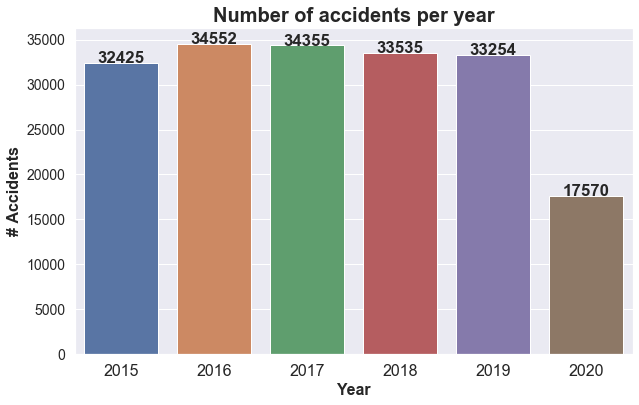

In [53]:
# Visualize Number of Incidents per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=concat2['Year'].value_counts().index, y=concat2['Year'].value_counts())
plt.title("Number of accidents per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

Text(0.5, 1, 'Accidents per day of week per hour')

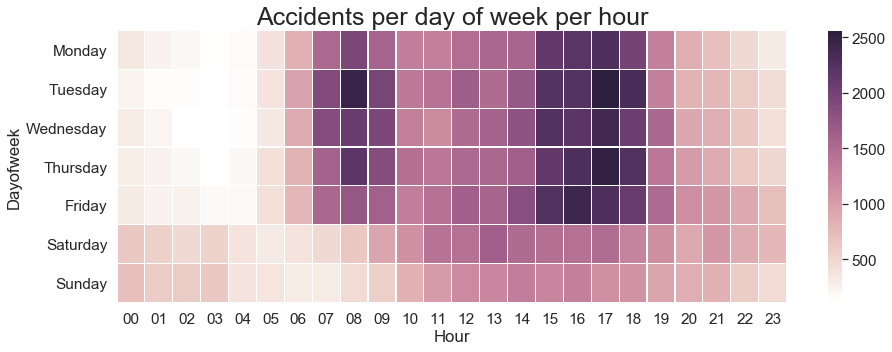

In [54]:
sns.set(font_scale=1.4)
heat_data=concat2.groupby(['Dayofweek', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per day of week per hour', fontsize=25)